# Assignment 7

### Exercise 7
In the lab, we applied random forests to the Boston data using mtry=6 and using ntree=25 and ntree=500. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for mtry and ntree. You can model your plot after Figure 8.10. Describe the results obtained.


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [21]:
boston = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


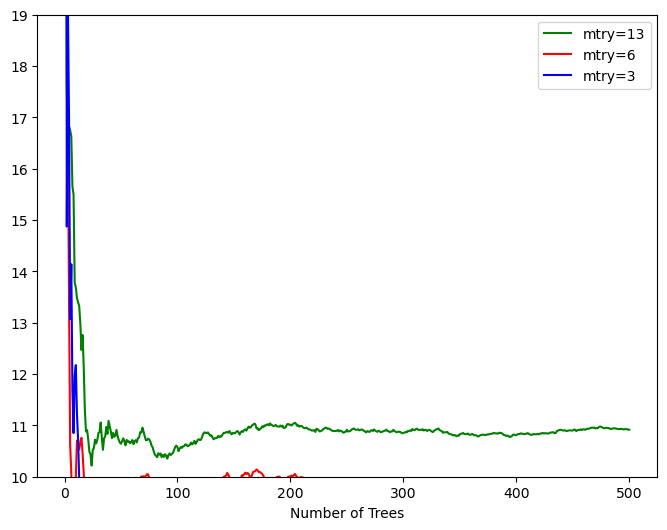

In [30]:
X = boston.drop('medv', axis = 1)
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

ntree_vals = range(1, 501)
p = 13
mtry_vals = [p, p//2, int(np.sqrt(p))]
test_mse = np.zeros((len(mtry_vals), len(ntree_vals)))
for i, mtry in enumerate(mtry_vals):
    for j,ntree in enumerate(ntree_vals):
        rf = RandomForestRegressor(n_estimators = ntree, max_features = mtry, random_state = 100)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        test_mse[i,j] = np.mean((y_test - y_pred)**2)
        

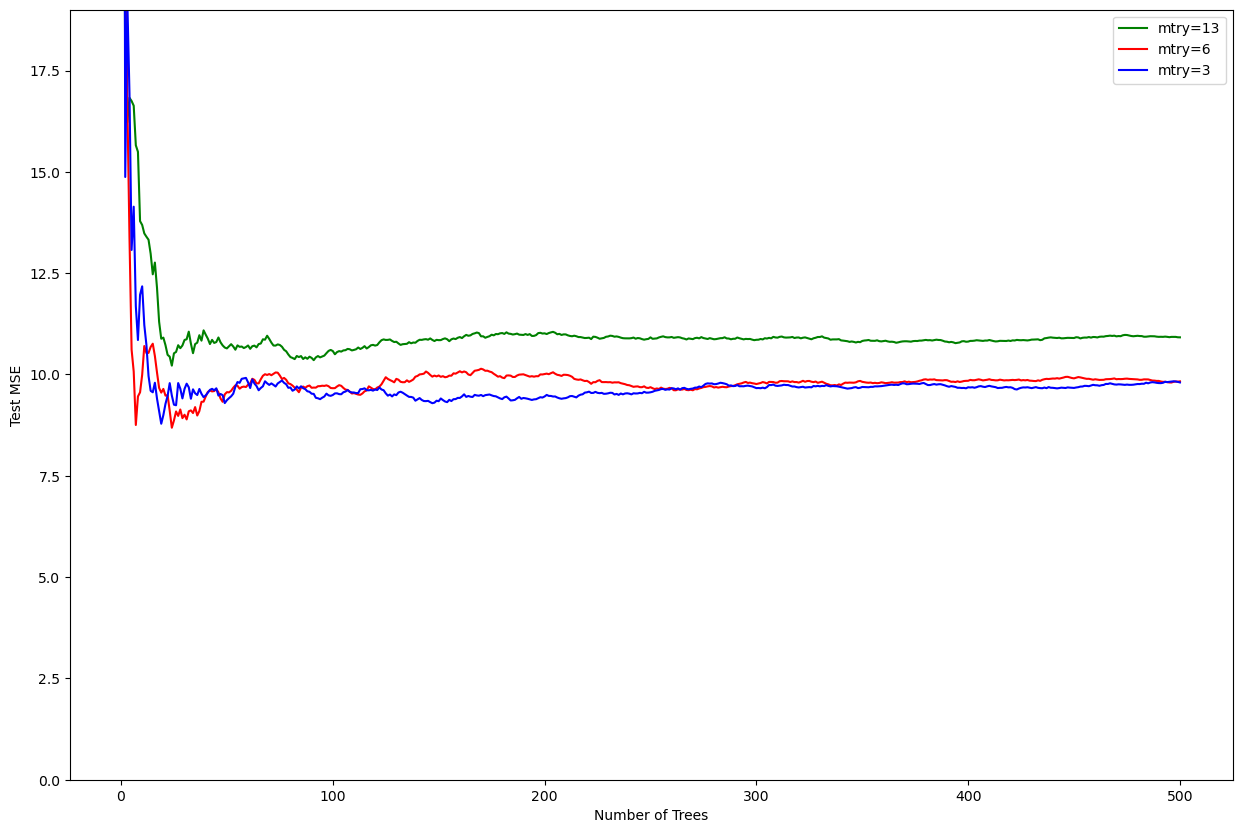

In [33]:
plt.figure(figsize = (15,10))
colors = ['green', 'red', 'blue']
for i in range(len(mtry_vals)):
    plt.plot(ntree_vals, test_mse[i,:], color = colors[i], label = 'mtry={}'.format(mtry_vals[i]))
plt.xlabel('Number of Trees')
plt.ylabel('Test MSE')
plt.ylim(0, 19)
plt.legend()
plt.show()

The plot shows that test MSE for single tree is quite high (around 18). It is reduced by adding more trees to the model and stabilizes around a few hundred trees. Test MSE for including all variables at split is higher (around 11) as compared to both using half or square-root number of variables (both round 9).

### Exercise 9

This problem involves the OJ data set which is part of the ISLR package.


(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.


In [35]:
oj = pd.read_csv("OJ.csv")
oj.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [36]:
oj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1070 non-null   int64  
 1   Purchase        1070 non-null   object 
 2   WeekofPurchase  1070 non-null   int64  
 3   StoreID         1070 non-null   int64  
 4   PriceCH         1070 non-null   float64
 5   PriceMM         1070 non-null   float64
 6   DiscCH          1070 non-null   float64
 7   DiscMM          1070 non-null   float64
 8   SpecialCH       1070 non-null   int64  
 9   SpecialMM       1070 non-null   int64  
 10  LoyalCH         1070 non-null   float64
 11  SalePriceMM     1070 non-null   float64
 12  SalePriceCH     1070 non-null   float64
 13  PriceDiff       1070 non-null   float64
 14  Store7          1070 non-null   object 
 15  PctDiscMM       1070 non-null   float64
 16  PctDiscCH       1070 non-null   float64
 17  ListPriceDiff   1070 non-null   f

In [37]:
train = oj.sample(n=800, random_state = 100)
test = oj.drop(train.index)

print(len(train), len(test))

800 270


(b) Fit a tree to the training data, with Purchase as the response and the other variables except for Buy as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

In [75]:
X_train = train.drop(["Purchase", "Store7"], axis = 1)
y_train = train['Purchase']
X_test = test.drop(['Purchase', 'Store7'], axis = 1)
y_test = test['Purchase']
tree = DecisionTreeClassifier(random_state = 0, max_depth= 3, max_features = 3)
tree.fit(X_train, y_train)

importances = tree.feature_importances_
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance}")

print(tree.tree_.node_count)
print(tree.tree_.max_depth)
print(tree.score(X_train, y_train))

Unnamed: 0: 0.0
WeekofPurchase: 0.0
StoreID: 0.03163331943168616
PriceCH: 0.0
PriceMM: 0.014512279619235288
DiscCH: 0.0
DiscMM: 0.0
SpecialCH: 0.0
SpecialMM: 0.0
LoyalCH: 0.8565070785624666
SalePriceMM: 0.0
SalePriceCH: 0.0
PriceDiff: 0.09734732238661199
PctDiscMM: 0.0
PctDiscCH: 0.0
ListPriceDiff: 0.0
STORE: 0.0
15
3
0.82625


(c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

In [71]:
tree_text = export_text(tree, feature_names= list(X_train.columns), decimals = 2)
print(tree_text)

|--- LoyalCH <= 0.48
|   |--- StoreID <= 1.50
|   |   |--- PriceMM <= 2.16
|   |   |   |--- class: MM
|   |   |--- PriceMM >  2.16
|   |   |   |--- class: CH
|   |--- StoreID >  1.50
|   |   |--- StoreID <= 3.50
|   |   |   |--- class: MM
|   |   |--- StoreID >  3.50
|   |   |   |--- class: MM
|--- LoyalCH >  0.48
|   |--- PriceDiff <= 0.01
|   |   |--- LoyalCH <= 0.71
|   |   |   |--- class: MM
|   |   |--- LoyalCH >  0.71
|   |   |   |--- class: CH
|   |--- PriceDiff >  0.01
|   |   |--- PriceDiff <= 0.27
|   |   |   |--- class: CH
|   |   |--- PriceDiff >  0.27
|   |   |   |--- class: CH



The first branch first splits the data if loyalch is smaller than 0.48. Then continues to split the data if storeID is < 1.5, then split aggain if priceMM is < 2.16 and assigns it the value MM

(d) Create a plot of the tree, and interpret the results.

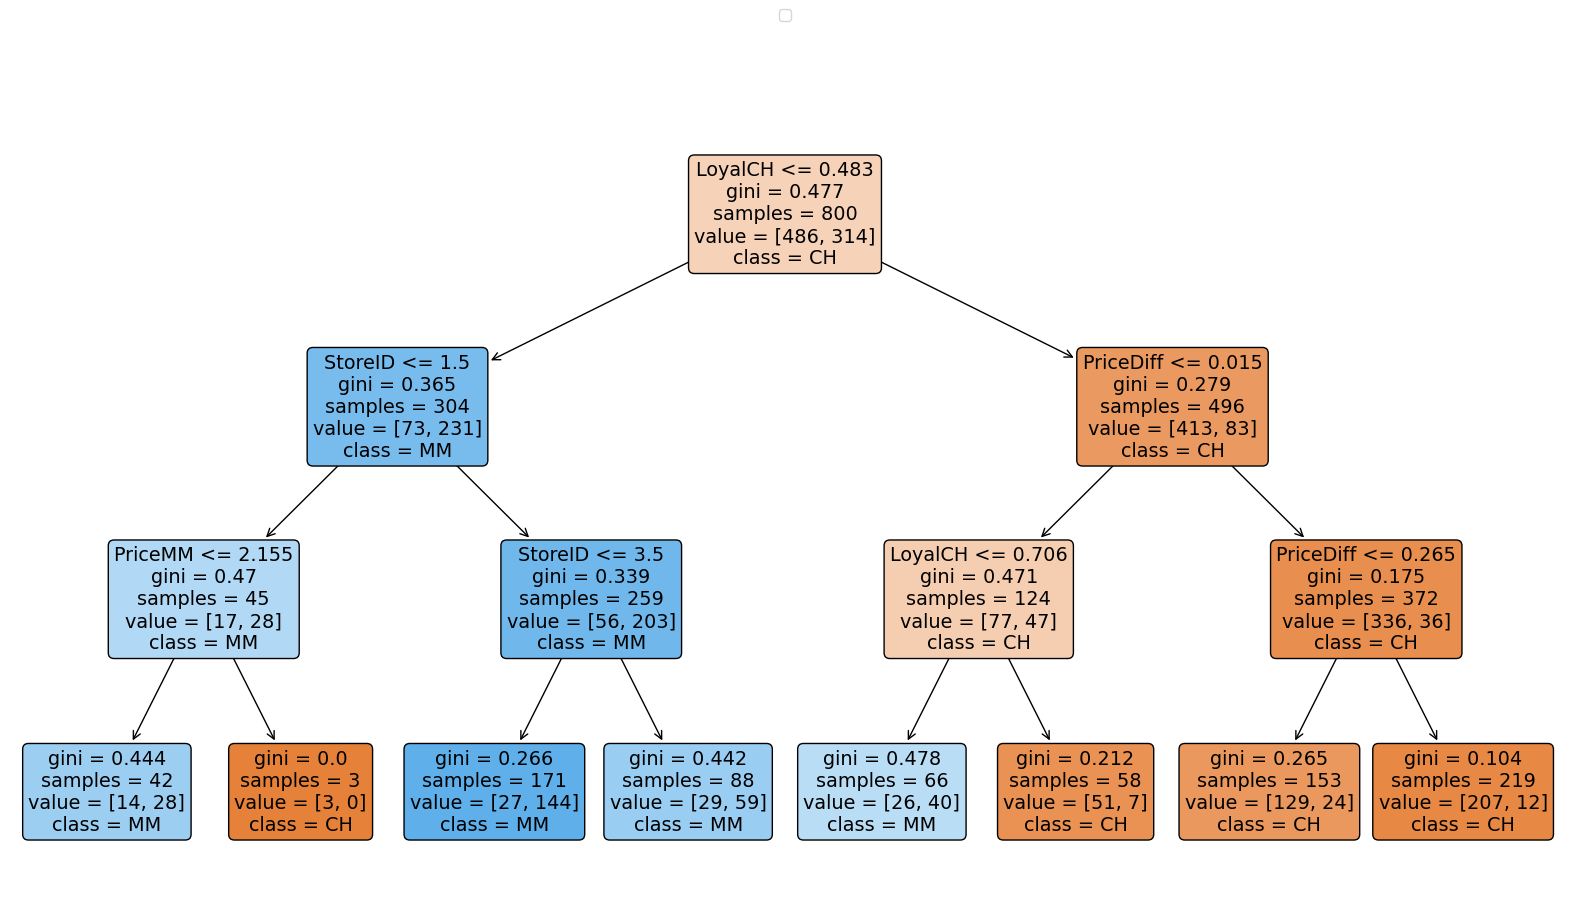

In [72]:
plt.figure(figsize = (20,10))
plot_tree(tree, feature_names = X_train.columns, filled = True, rounded = True, class_names = ['CH', 'MM'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2,
           labels=['MM (blue)', 'CH (orange)'])
plt.show()

(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

[[138  29]
 [ 18  85]]


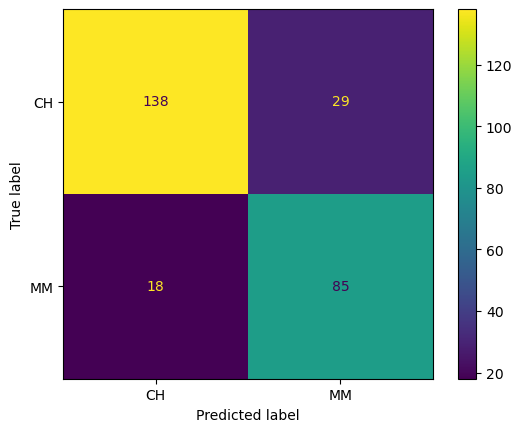

In [87]:
y_pred = tree.predict(X_test)
conf_mat = confusion_matrix( y_test, y_pred, labels = ['CH',"MM"])
cmd  = ConfusionMatrixDisplay(conf_mat, display_labels = ['CH','MM'])
cmd.plot()
print(conf_mat)

In [80]:
test_error_rate = 1 - tree.score(X_test, y_test)
print("Test error rate:", test_error_rate)

Test error rate: 0.17407407407407405


(f) Apply the cv.tree() function to the training set in order to determine the optimal tree size.

In [93]:
param_grid = {'max_depth': range(1,20), 'max_features' : range(1, X_train.shape[1]+1)}
tree = DecisionTreeClassifier(random_state=0)
grid = GridSearchCV(tree, param_grid = param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 3, 'max_features': 3}
0.8175000000000001


(g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

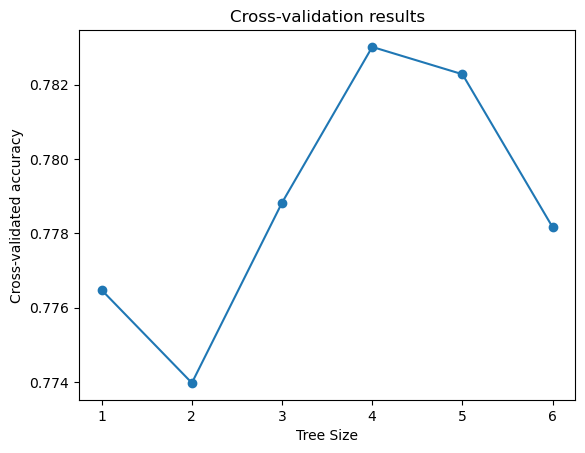

In [100]:
import matplotlib.pyplot as plt

# Extract the cross-validated scores from grid_search.cv_results_
scores = grid.cv_results_['mean_test_score']

# Get the range of max_depth values that were tested
max_depth_range = range(1, 7)

# Compute the mean cross-validated score for each max_depth value
mean_scores = []
for max_depth in max_depth_range:
    # Get the scores for all max_features values for this max_depth
    scores_for_max_depth = scores[grid.cv_results_['param_max_depth'] == max_depth]
    # Compute the mean score for this max_depth
    mean_score_for_max_depth = np.mean(scores_for_max_depth)
    mean_scores.append(mean_score_for_max_depth)

# Plot the results
plt.plot(max_depth_range, mean_scores, marker='o')
plt.xlabel('Tree Size')
plt.ylabel('Cross-validated accuracy')
plt.title('Cross-validation results')
plt.show()
